In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as wb
import matplotlib.pyplot as plt

In [2]:
stocks = ["TSLA", "NFLX", "GOOG", "MSFT"]
data = pd.DataFrame()
for s in stocks:
    data[s] = wb.DataReader(s, data_source='google', start='2012-1-1')['Close']

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1356 entries, 2012-01-03 to 2017-05-23
Data columns (total 4 columns):
TSLA    1356 non-null float64
NFLX    1356 non-null float64
GOOG    1356 non-null float64
MSFT    1356 non-null float64
dtypes: float64(4)
memory usage: 53.0 KB


In [4]:
data.head()

,TSLA,NFLX,GOOG,MSFT
Date,,,,
2012-01-03,28.08,10.32,332.37,26.76
2012-01-04,27.71,11.49,333.81,27.40
2012-01-05,27.12,11.33,329.18,27.68
2012-01-06,26.89,12.35,324.68,28.10
2012-01-09,27.25,14.03,310.92,27.74


In [5]:
data.tail()

,TSLA,NFLX,GOOG,MSFT
Date,,,,
2017-05-17,306.11,153.20,919.62,67.48
2017-05-18,313.06,155.70,930.24,67.71
2017-05-19,310.83,157.02,934.01,67.69
2017-05-22,310.35,157.16,941.86,68.45
2017-05-23,303.86,157.95,948.82,68.68


# Normalization to 100:

$$
\frac{P_1}{P_0} * 100
$$

In [6]:
data.iloc[0]

TSLA     28.08
NFLX     10.32
GOOG    332.37
MSFT     26.76
Name: 2012-01-03 00:00:00, dtype: float64

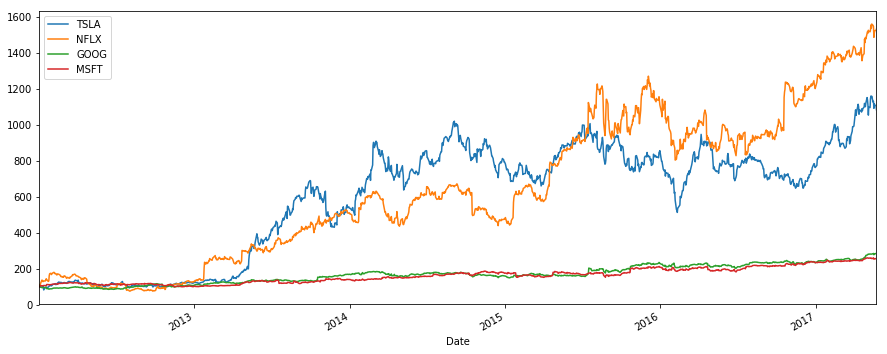

In [7]:
(data / data.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

# Calculating the Return of a Portfolio

In [8]:
returns = (data / data.shift(1)) -1 # simple returns
returns.head()

,TSLA,NFLX,GOOG,MSFT
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,-0.013177,0.113372,0.004333,0.023916
2012-01-05,-0.021292,-0.013925,-0.013870,0.010219
2012-01-06,-0.008481,0.090026,-0.013670,0.015173
2012-01-09,0.013388,0.136032,-0.042380,-0.012811


In [9]:
weights = np.array([0.45, 0.45, 0.05, 0.05])
np.dot(returns, weights)

array([        nan,  0.0465004 , -0.01603026, ...,  0.00079744,
        0.00068792, -0.00661083])

In [10]:
annual_returns = returns.mean() * 250
annual_returns

TSLA    0.560862
NFLX    0.641218
GOOG    0.218949
MSFT    0.199482
dtype: float64

In [11]:
annual = np.dot(annual_returns, weights)

In [12]:
portfolio = str(round(annual, 5) * 100) + "%"
print(portfolio)

56.186%
